In [3]:
# we import the data from the other notebook
%run data.ipynb

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,1
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,1
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,1
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,1
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,1


In [5]:
X = df.drop('income', axis=1)
Y = df['income']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, stratify=Y, random_state=10,
)

In [6]:

#Support Vector Machine Based Classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from collections import defaultdict

scores = defaultdict(dict)

classifiers = {
    'logistic-regression' : LogisticRegression,
    'k-nearest-neighbors' : KNeighborsClassifier,
    'decision-tree' : DecisionTreeClassifier,
    'gaussian-nb' : GaussianNB
    
}

In [7]:
clf = LogisticRegression()

In [8]:
clf.fit(X_train, Y_train)

/home/andreas/projects/geordi/algoneer/algoneer/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred_test = clf.predict(X_test) == Y_test

print(accuracy_score(Y_pred_test, Y_test))

0.8935020267780371


## Partial Dependence Plot

To make a partial dependence plot for a given feature, we implement the following algorithm:

* If the feature is categorical, we generate a list of all possible feature values.
* If the features is numerical, we generate a list of values spanning the valid range of the feature
* For each value from the list of values, we calculate the average prediction value (for regression) or the class frequencies (for classification) over all datapoints in the dataset.
* We plot the resulting value as a function of the feature value.

In [10]:
def pdp_categorical(X, model, column):
    """
    Generate the partial dependence
    """
    values = X[column]
    uniques = values.unique()
    YS = []
    for v in uniques:
        NX = X.copy()
        NX[column] = v
        Y = clf.predict(NX)
        YS.append(sum(Y)/len(Y))
    return uniques, sorted(YS)

In [13]:
x, pdv = pdp_categorical(X_test, clf, "hours-per-week")

In [17]:
import matplotlib.pylab as pl

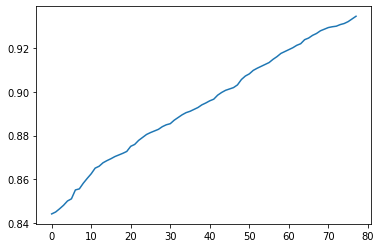

In [18]:
pl.plot(pdv)